<h1 style='color:orange;'>Happy index</h1>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import numpy as np

In [15]:
#Function to load data
def load_data(filename,cols):
    dataset = pd.read_csv(filename,usecols=cols)
    dataset = dataset[cols]
    return dataset

In [16]:
# Including file and data
cols = ['Happiness Rank','Happiness_Score','Economy','Freedom','Generosity','Happiness']
filename = 'data.csv'
df = load_data(filename, cols)

In [17]:
df.head(3)

,Happiness Rank,Happiness_Score,Economy,Freedom,Generosity,Happiness
0,154,3.203,0.35000,0.00000,0.15800,0
1,154,3.360,0.38227,0.16430,0.31268,0
2,153,3.575,0.31982,0.23414,0.36510,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Happiness Rank   782 non-null    int64  
 1   Happiness_Score  782 non-null    float64
 2   Economy          778 non-null    float64
 3   Freedom          779 non-null    float64
 4   Generosity       779 non-null    float64
 5   Happiness        782 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 36.8 KB


In [19]:
# Check if NULL values present in data
df.columns[df.isna().any()]

Index(['Economy', 'Freedom', 'Generosity'], dtype='object')

In [20]:
#For NULL values
import math
median_economy = df.Economy.median()
median_freedom = df.Freedom.median()
median_generosity = df.Generosity.median()
print(f'median economy:{median_economy}, median freedom:{median_freedom}, median Generosity:{median_generosity}')

# Fill NULL values with median value
df.Economy = df.Economy.fillna(median_economy)
df.Freedom = df.Freedom.fillna(median_freedom)
df.Generosity = df.Generosity.fillna(median_generosity)

median economy:0.984, median freedom:0.43166000000000004, median Generosity:0.17922000000000002


<h3>Plotting<h3>

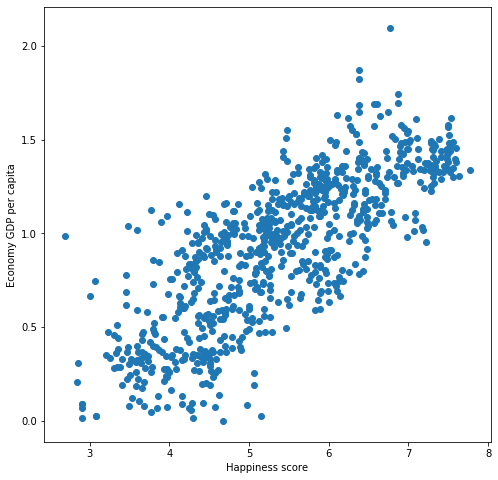

In [21]:
#Scatter plot
plt.figure(figsize=(8,8))
plt.xlabel('Happiness score')
plt.ylabel('Economy GDP per capita')
plt.scatter(df['Happiness_Score'], df['Economy'])

<h3>Linear regression</h3>

In [22]:
reg = linear_model.LinearRegression()
reg.fit(df[['Happiness_Score']],df.Economy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
reg.predict([[7.1]])

array([1.40521303])

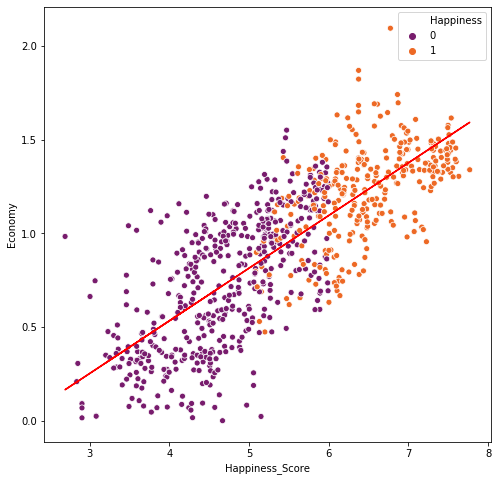

In [24]:
#Linear regression line plotting
plt.figure(figsize=(8,8))
plt.xlabel('Happiness_score')
plt.ylabel('Economy GDP per capita')
sns.scatterplot(x=df.Happiness_Score,y=df.Economy,hue=df.Happiness,palette = 'inferno',data = df)
plt.plot(df.Happiness_Score,reg.predict(df[['Happiness_Score']]), color='red')

<h4>Linear regression with multiple variables</h4>

In [25]:
# Linear regression multiple variables
reg = linear_model.LinearRegression()
reg.fit(df[['Economy','Freedom','Generosity']],df.Happiness_Score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# economy = input('Input economy [0-2.0]: ')
# freedom = input('Input freedom [0-.700]: ')
# generosity = input('Input generosity [0-.8]: ')
# HappinessScore = reg.predict([[float(economy),float(freedom),float(generosity)]])
# print(f'Happiness score is {HappinessScore} for economy:{economy} freedom:{freedom} generosity:{generosity}')

<h3>Classsification</h3>

In [27]:
df.head()

,Happiness Rank,Happiness_Score,Economy,Freedom,Generosity,Happiness
0,154,3.203,0.350000,0.00000,0.158000,0
1,154,3.360,0.382270,0.16430,0.312680,0
2,153,3.575,0.319820,0.23414,0.365100,0
3,145,3.632,0.332000,0.08500,0.191000,0
4,141,3.794,0.401477,0.10618,0.061158,0


In [28]:
target=df.Happiness
inputs=df.drop('Happiness',axis=1,inplace=True)
inputs=df.drop('Happiness Rank',axis=1,inplace=True)
inputs=df.drop('Happiness_Score',axis=1)

In [29]:
#Recheck if any NULL values present
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

<h5>Random forest</h5>

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[80 19]
 [18 40]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.68      0.69      0.68        58

    accuracy                           0.76       157
   macro avg       0.75      0.75      0.75       157
weighted avg       0.77      0.76      0.76       157

0.7643312101910829


In [32]:
print(f"""length of X_train:{len(X_train)} 
          X_test:{len(X_test)}""")

length of X_train:625 
          X_test:157


<h5>Naive bayes</h5>

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8089171974522293